<a href="https://colab.research.google.com/github/ShrutiJain456/compute/blob/main/Copy_of_SVM_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1 Import and explore the data
Dataset Link: https://drive.google.com/file/d/1tPHOMKD_ef-j8MuynCn2fSpbrL11-J1l/view?usp=sharing


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/pulsar.txt')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [3]:
df.set_axis(['Mean_IP',	'STD_IP',	'ExcessKurtosis_IP',	'Skewness_IP',	'MeanDM-SNR_Curve',	'STD-DM-SNR_Curve',
             'ExcessKurtosisDM-SNR_Curve',	'SkewnessDM-SNR_Curve',	'target_class'], axis = 1 , inplace = True)
df

,Mean_IP,STD_IP,ExcessKurtosis_IP,Skewness_IP,MeanDM-SNR_Curve,STD-DM-SNR_Curve,ExcessKurtosisDM-SNR_Curve,SkewnessDM-SNR_Curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


##Q2 Carry out data pre-processing

In [4]:
df.shape

(12528, 9)

In [5]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [6]:
df.isnull().sum()

Mean_IP                          0
STD_IP                           0
ExcessKurtosis_IP             1735
Skewness_IP                      0
MeanDM-SNR_Curve                 0
STD-DM-SNR_Curve              1178
ExcessKurtosisDM-SNR_Curve       0
SkewnessDM-SNR_Curve           625
target_class                     0
dtype: int64

In [7]:
count = 0 
for i in df.isnull().sum(axis = 1):
  if i > 1:
    count = count + 1
print(count)
percent = (count / len(df.index))*100
print(percent)

278
2.219029374201788


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


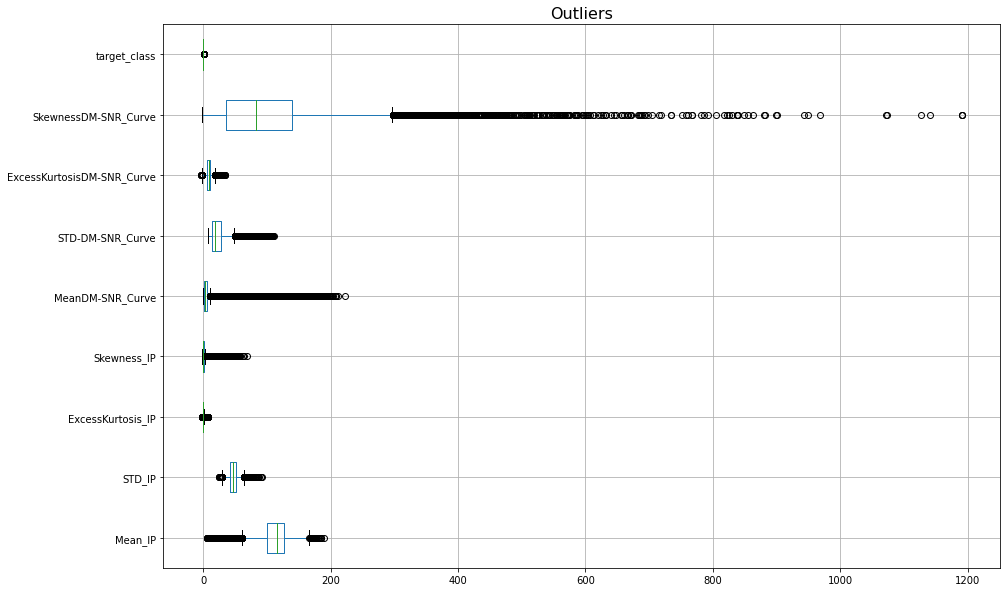

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
plt.title('Outliers', fontsize =16)
df.boxplot(vert = 0)

In [9]:
#since data is quite skewed , replace missing values with median
df = df.fillna(value = df[['ExcessKurtosis_IP', 'STD-DM-SNR_Curve', 'SkewnessDM-SNR_Curve']].median())
df.isnull().sum()

Mean_IP                       0
STD_IP                        0
ExcessKurtosis_IP             0
Skewness_IP                   0
MeanDM-SNR_Curve              0
STD-DM-SNR_Curve              0
ExcessKurtosisDM-SNR_Curve    0
SkewnessDM-SNR_Curve          0
target_class                  0
dtype: int64

In [10]:
df.describe()

,Mean_IP,STD_IP,ExcessKurtosis_IP,Skewness_IP,MeanDM-SNR_Curve,STD-DM-SNR_Curve,ExcessKurtosisDM-SNR_Curve,SkewnessDM-SNR_Curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


##Q3 Scale the data using Standard Scaler

####Q3a According to you, why is scaling important in SVM? What are the different methods for scaling the data available in sklearn.preprocessing?

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)



```
scaling is important to adjust all the feature values in the same range making it easier to visualize and draw conclusions.
Scaling is crucial in SVM as SVM considers distances between observations and they differ fro scaled aand non scaled values.
Two prominent methods are : 1. StandardScaler() 2.MinMaxScaler()
Other methods are : MaxAbsScaler, Robustscaler
```



##Q4 Split the data in traina and test set

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['target_class'], axis = 1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

##Q5 Implement SVM

Different types of kernels in SVM:
https://www.kaggle.com/discussions/questions-and-answers/326336


###Q5a Linear SVM

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [13]:
from sklearn.svm import SVC
linear_svc=SVC(kernel='linear', C=0.1)

linear_svc.fit(X_train, y_train)
y_pred_test=linear_svc.predict(X_test)

In [14]:
linear_svc=SVC(kernel='linear', C=1)
linear_svc.fit(X_train, y_train)
y_pred_test1=linear_svc.predict(X_test)

In [15]:
linear_svc=SVC(kernel='linear', C=10)
linear_svc.fit(X_train, y_train)
y_pred_test2=linear_svc.predict(X_test)

In [16]:
linear_svc=SVC(kernel='linear', C=100)
linear_svc.fit(X_train, y_train)
y_pred_test3=linear_svc.predict(X_test)

In [17]:
linear_svc=SVC(kernel='linear', C=1000)
linear_svc.fit(X_train, y_train)
y_pred_test4=linear_svc.predict(X_test)

In [19]:
from sklearn.metrics import f1_score,accuracy_score
print('Model f1 score with linear kernel and C=0.1 : {0:0.4f}'. format(f1_score(y_test, y_pred_test)))
print('Model f1 score with linear kernel and C=1 : {0:0.4f}'. format(f1_score(y_test, y_pred_test1)))
print('Model f1 score with linear kernel and C=10 : {0:0.4f}'. format(f1_score(y_test, y_pred_test2)))
print('Model f1 score with linear kernel and C=100 : {0:0.4f}'. format(f1_score(y_test, y_pred_test3)))
print('Model f1 score with linear kernel and C=1000 : {0:0.4f}'. format(f1_score(y_test,y_pred_test4)))

Model accuracy score with linear kernel and C=0.1 : 0.8727
Model accuracy score with linear kernel and C=1 : 0.8700
Model accuracy score with linear kernel and C=10 : 0.8721
Model accuracy score with linear kernel and C=100 : 0.8677
Model accuracy score with linear kernel and C=1000 : 0.8649


In [40]:
y_pred_train = linear_svc.predict(X_train)
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, y_pred_train)))

Training-set f1 score: 0.8502


In [41]:
#best cost is 1000 with an f1_score of 0.8649

###Q5b Polynomial Kernel

Apply Linear SVM for degrees = [1,2,3,4,5], predict for the test set and check f1 score for each of the degrees. State the best degree. 

In [21]:
poly_svc = SVC(kernel = 'poly', degree = 1)
poly_svc.fit(X_train, y_train)
y_pred_d1 = poly_svc.predict(X_test)
print("model f1 score with polynomial kernel and degree is 1 : {0:0.3f}". format(f1_score(y_test,y_pred_d1)))

model accuracy score with polynomial kernel and degree is 1 : 0.828


In [25]:
poly_svc = SVC(kernel = 'poly', degree = 2)
poly_svc.fit(X_train, y_train)
y_pred_d2 = poly_svc.predict(X_test)
print("model f1 score with polynomial kernel and degree is 2 : {0:0.3f}". format(f1_score(y_test,y_pred_d2)))

model accuracy score with polynomial kernel and degree is 2 : 0.843


In [24]:
poly_svc = SVC(kernel = 'poly', degree = 3)
poly_svc.fit(X_train, y_train)
y_pred_d3 = poly_svc.predict(X_test)
print("model f1 score with polynomial kernel and degree is 3 : {0:0.3f}". format(f1_score(y_test,y_pred_d3)))

model accuracy score with polynomial kernel and degree is 3 : 0.851


In [23]:
poly_svc = SVC(kernel = 'poly', degree = 4)
poly_svc.fit(X_train, y_train)
y_pred_d4 = poly_svc.predict(X_test)
print("model f1 score with polynomial kernel and degree is 4 : {0:0.3f}". format(f1_score(y_test,y_pred_d4)))

model accuracy score with polynomial kernel and degree is 4 : 0.854


In [22]:
poly_svc = SVC(kernel = 'poly', degree = 5)
poly_svc.fit(X_train, y_train)
y_pred_d5 = poly_svc.predict(X_test)
print("model f1 score with polynomial kernel and degree is 5 : {0:0.3f}". format(f1_score(y_test,y_pred_d5)))

model accuracy score with polynomial kernel and degree is 5 : 0.838


In [42]:
y_pred_train = poly_svc.predict(X_train)
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, y_pred_train)))

Training-set f1 score: 0.8117


In [43]:
#degree 1 gave the best result with an f1_score of 0.828


###Q5c Sigmoid Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [34]:
sig_svc = SVC(kernel = 'sigmoid', C = 0.1)
sig_svc.fit(X_train, y_train)
y_pred_s1 = sig_svc.predict(X_test)
print("Model f1 score with sigmoid kernel and cost 0.1 : {0:0.4f}". format(f1_score(y_test,y_pred_s1)))

Model f1 score with sigmoid kernel and cost 0.1 : 0.5681


In [33]:
sig_svc = SVC(kernel = 'sigmoid', C = 1)
sig_svc.fit(X_train, y_train)
y_pred_s2 = sig_svc.predict(X_test)
print("Model f1 score with sigmoid kernel and cost 1 : {0:0.4f}". format(f1_score(y_test,y_pred_s2)))

Model f1 score with sigmoid kernel and cost 1 : 0.5313


In [32]:
sig_svc = SVC(kernel = 'sigmoid', C = 10)
sig_svc.fit(X_train, y_train)
y_pred_s3 = sig_svc.predict(X_test)
print("Model f1 score with sigmoid kernel and cost 10 : {0:0.4f}". format(f1_score(y_test,y_pred_s3)))

Model f1 score with sigmoid kernel and cost 10 : 0.5226


In [31]:
sig_svc = SVC(kernel = 'sigmoid', C = 100)
sig_svc.fit(X_train, y_train)
y_pred_s4 = sig_svc.predict(X_test)
print("Model f1 score with sigmoid kernel and cost 100 : {0:0.4f}". format(f1_score(y_test,y_pred_s4)))

Model f1 score with sigmoid kernel and cost 100 : 0.5219


In [30]:
sig_svc = SVC(kernel = 'sigmoid', C = 1000)
sig_svc.fit(X_train, y_train)
y_pred_s5 = sig_svc.predict(X_test)
print("Model f1 score with sigmoid kernel and cost 1000 : {0:0.4f}". format(f1_score(y_test,y_pred_s5)))

Model f1 score with sigmoid kernel and cost 1000 : 0.5219


In [44]:
y_pred_train = sig_svc.predict(X_train)
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, y_pred_train)))

Training-set f1 score: 0.5733


In [ ]:
#best cost is 0.1

###Q5d RBF Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [35]:
rbf_svc = SVC(kernel = 'rbf', C = 0.1)
rbf_svc.fit(X_train, y_train)
y_pred_r1 = rbf_svc.predict(X_test)
print("Model f1 score with rbf kernel and cost 0.1 : {0:0.4f}". format(f1_score(y_test,y_pred_r1)))

Model f1 score with rbf kernel and cost 0.1 : 0.8079


In [36]:
rbf_svc = SVC(kernel = 'rbf', C = 1)
rbf_svc.fit(X_train, y_train)
y_pred_r2 = rbf_svc.predict(X_test)
print("Model f1 score with rbf kernel and cost 1 : {0:0.4f}". format(f1_score(y_test,y_pred_r2)))

Model f1 score with rbf kernel and cost 1 : 0.8426


In [37]:
rbf_svc = SVC(kernel = 'rbf', C = 10)
rbf_svc.fit(X_train, y_train)
y_pred_r3 = rbf_svc.predict(X_test)
print("Model f1 score with rbf kernel and cost 10 : {0:0.4f}". format(f1_score(y_test,y_pred_r3)))

Model f1 score with rbf kernel and cost 10 : 0.8508


In [38]:
rbf_svc = SVC(kernel = 'rbf', C = 100)
rbf_svc.fit(X_train, y_train)
y_pred_r4 = rbf_svc.predict(X_test)
print("Model f1 score with rbf kernel and cost 100 : {0:0.4f}". format(f1_score(y_test,y_pred_r4)))

Model f1 score with rbf kernel and cost 100 : 0.8786


In [39]:
rbf_svc = SVC(kernel = 'rbf', C = 1000)
rbf_svc.fit(X_train, y_train)
y_pred_r5 = rbf_svc.predict(X_test)
print("Model f1 score with rbf kernel and cost 1000 : {0:0.4f}". format(f1_score(y_test,y_pred_r5)))

Model f1 score with rbf kernel and cost 1000 : 0.8716


In [45]:
y_pred_train = rbf_svc.predict(X_train)
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, y_pred_train)))

Training-set f1 score: 0.8783


In [ ]:
#best cost is 100